
 # <font color='blue'> HR Analytics: Job Change of Data Scientists </font> 
 
 
 In this project, we will use the CRISP-DM (Cross-Industrie Standard Process for Data Mining) to predict job change of data scientists in a particular company. We use this framework in order to work with a robust and well-proven methodology. Each stage of this framwork will be describe in details belong this project.
 
 
## Business Understanding
 

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

## Data Understanding

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company

Import of the libraries and functions to be used.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew, boxcox
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc

### Describe data 

Loading of training and test data sets.

In [2]:
train_data=pd.read_csv('aug_train.csv')
test_data=pd.read_csv('aug_test.csv')
train_data.head()
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Verification of variable information.

In [3]:
print("Train Data INFO \n")
train_data.info() 

Train Data INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64

### Explore data

Crossing of variables with the "target" variable.

In [4]:
gen_targ=pd.crosstab(train_data.gender, train_data.target,margins=True)
rev_exp_targ=pd.crosstab(train_data.relevent_experience, train_data.target,margins=True)
edu_lvl_targ=pd.crosstab(train_data.education_level, train_data.target,margins=True)
las_job_targ=pd.crosstab(train_data.last_new_job, train_data.target,margins=True)

Visualization of the crossing of previously made information.

<AxesSubplot:xlabel='last_new_job', ylabel='value'>

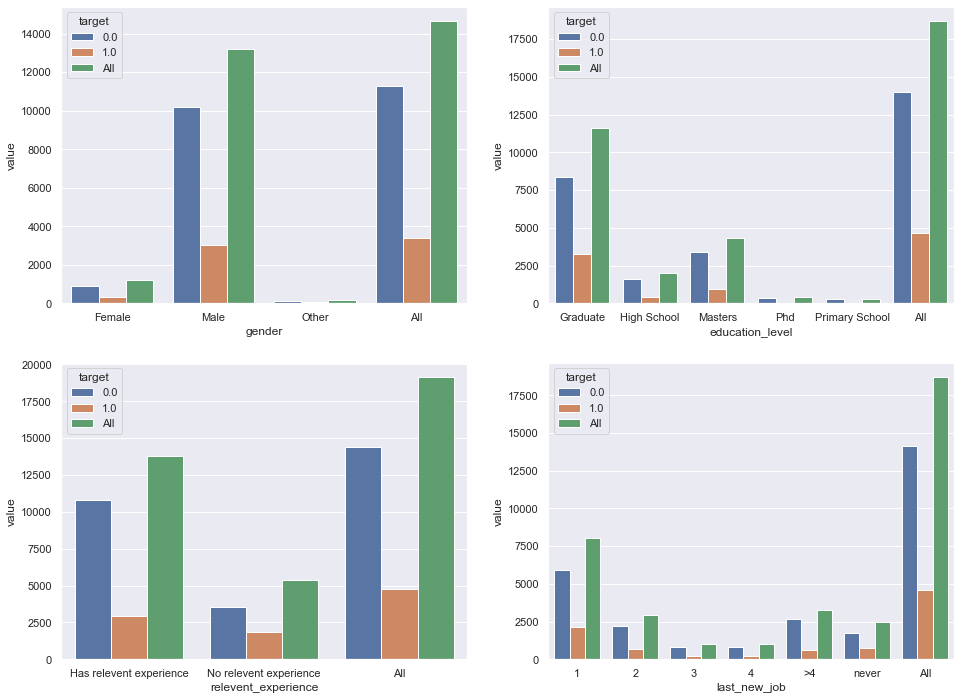

In [6]:

stacked1 = gen_targ.stack().reset_index().rename(columns={0:'value'})
stacked2 = rev_exp_targ.stack().reset_index().rename(columns={0:'value'})
stacked3 = edu_lvl_targ.stack().reset_index().rename(columns={0:'value'})
stacked4 = las_job_targ.stack().reset_index().rename(columns={0:'value'})


fig, axs = plt.subplots(nrows=2,ncols=2)
sns.set(rc={'figure.figsize':(16,12)})
sns.barplot(x=stacked1.gender, y=stacked1.value,hue=stacked1.target,ax=axs[0,0])
sns.barplot(x=stacked2.relevent_experience, y=stacked2.value, hue=stacked2.target,ax=axs[1,0])
sns.barplot(x=stacked3.education_level, y=stacked3.value, hue=stacked3.target,ax=axs[0,1])
sns.barplot(x=stacked4.last_new_job, y=stacked4.value, hue=stacked4.target,ax=axs[1,1])

In [7]:
train_data.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

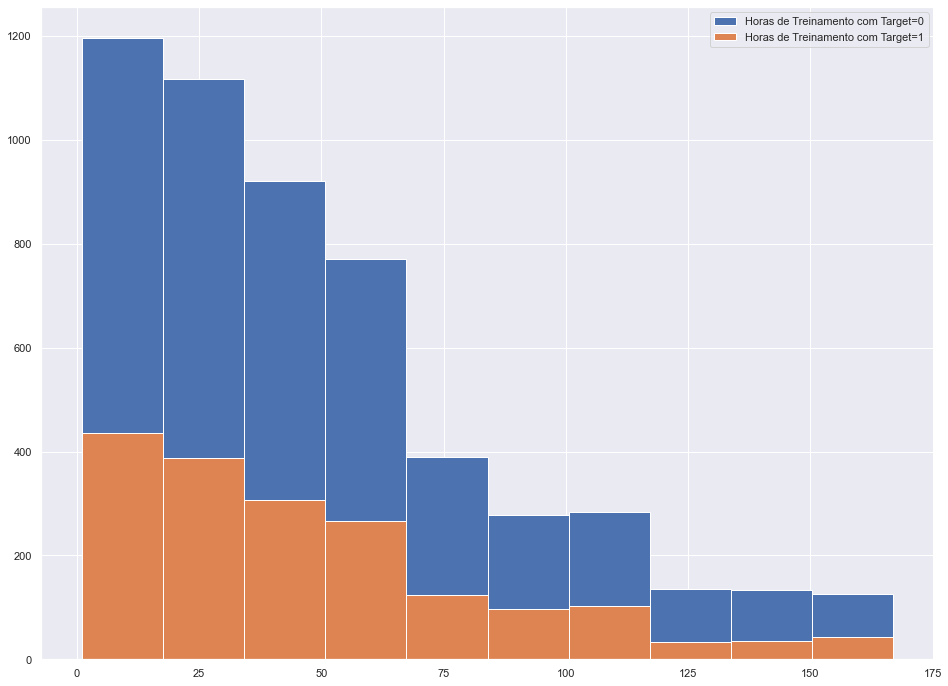

In [8]:
from matplotlib import pyplot

pyplot.hist(train_data[(train_data.training_hours) & (train_data.target==0)].training_hours,label='Horas de Treinamento com Target=0')
pyplot.hist(train_data[(train_data.training_hours) & (train_data.target==1)].training_hours,label='Horas de Treinamento com Target=1')
pyplot.legend(loc='upper right')
pyplot.show()

### Verify data quality

Finding missing values

In [9]:
train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [10]:
print("\t amount of existing null values \n \n ",train_data.isnull().sum())

	 amount of existing null valuesm 
 
  enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64


In [11]:
print("\t Percent of Null Values \n \n ",
      100*train_data.isnull().sum()/len(train_data))

	 Percent of Null Values 
 
  enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.563677
relevent_experience        0.000000
enrolled_university        1.958942
education_level            2.405224
major_discipline          14.680321
experience                 0.328839
company_size              30.816931
company_type              31.822239
last_new_job               2.175036
training_hours             0.000000
target                    10.001409
dtype: float64


## Data Preparation

We remove from the dataset the rows of the columns that have little missing data.

In [12]:
train_data.dropna(subset=["experience"], inplace=True)
train_data.dropna(subset=["enrolled_university"], inplace=True)
train_data.dropna(subset=["last_new_job"], inplace=True)
train_data.dropna(subset=["education_level"], inplace=True)

Filling in the missing values

In [13]:

#major_discipline
train_data["major_discipline"].fillna( method ='ffill', limit = 3, inplace = True)
train_data.dropna(subset=["major_discipline"], inplace=True) # retira o resto dos valores faltantes não preenchidos

#company_size
train_data["company_size"].fillna( method ='ffill', limit = 2, inplace = True)
train_data.dropna(subset=["company_size"], inplace=True)

#company_type
train_data["company_type"].fillna( method ='ffill', limit = 2, inplace = True)
train_data.dropna(subset=["company_type"], inplace=True)

#gender
train_data["gender"].fillna( method ='ffill', limit = 2, inplace = True)
train_data.dropna(subset=["gender"], inplace=True)


Numerical representation for categorical data

In [14]:
#gender
# male = 0 , female = 1, other = 2
train_data["gender"] = [ 0 if gender == "Male"
                        else 1 if gender == "Female"
                        else 2 for gender in train_data["gender"]]

# Has relevent experience = 0 , No relevent experience = 1
train_data["relevent_experience"] = [ 0 if i == "Has relevent experience"
                                    else 1 for i in train_data["relevent_experience"]]

#enrolled_university 
# no_enrollment = 0 , Full time course = 1, Part time course = 2
train_data["enrolled_university"] = [ 0 if i == "no_enrollment"
                                    else 1 if i == "Full time course"
                                    else 2 for i in train_data["enrolled_university"]]

#education_level
# Graduate = 0 , Masters = 1, High School = 2, Phd = 3, Primary School = 4 
train_data["education_level"] = [ 0 if i == "Graduate"
                                    else 1 if i == "Masters"
                                    else 2 if i == "High School"
                                    else 3 if i == "Phd" 
                                    else 4 for i in train_data["education_level"]]

#major_discipline 
# STEM  = 0 , Humanities = 1, Business Degree = 2, Arts = 3, No Major = 4, Other = 5 
train_data["major_discipline"] = [ 0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 for i in train_data["major_discipline"]]
#experience
train_data["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2 for i in train_data["experience"]]
#company_size
train_data["company_size"] = [ 0 if i == "10/49"
                                    else 1 for i in train_data["company_size"]]
#company_type
# pvt ltd = 0, Funded Startup  = 1 , Public Sector  = 2, Early Stage Startup = 3, NGO = 4 , else 5 
train_data["company_type"] = [ 0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5 for i in train_data["company_type"]]

train_data["company_type"] = [ 0 if i == 3 or i == 4
                               else 1 if i == 2
                               else 2 for i in train_data["company_type"]]

#last_new_job
train_data["last_new_job"] = [ 0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5 for i in train_data["last_new_job"]]

train_data["last_new_job"] = [ 0 if i == 4
                               else 1 if i == 5
                               else 2 for i in train_data["last_new_job"]]
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,0,1,0,0,0,2,1,2,1,47,0.0
2,11561,city_21,0.624,0,1,1,0,0,2,1,2,0,83,0.0
4,666,city_162,0.767,0,0,0,1,0,2,1,2,2,8,0.0
5,21651,city_176,0.764,0,0,2,0,0,1,1,2,2,24,1.0
6,28806,city_160,0.920,0,0,0,2,0,2,1,2,2,24,0.0


In [15]:
#city
le = LabelEncoder()
train_data["city"] = le.fit_transform(train_data["city"])
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,77,0.776,0,1,0,0,0,2,1,2,1,47,0.0
2,11561,64,0.624,0,1,1,0,0,2,1,2,0,83,0.0
4,666,50,0.767,0,0,0,1,0,2,1,2,2,8,0.0
5,21651,57,0.764,0,0,2,0,0,1,1,2,2,24,1.0
6,28806,49,0.920,0,0,0,2,0,2,1,2,2,24,0.0


## Modelling

In [16]:
train_data = train_data.reset_index(drop=True)
test = train_data[17248:]
test.drop(labels = ["target","enrollee_id"],axis = 1, inplace = True)
train = train_data[:17248]
train.drop(labels = ["enrollee_id"],axis = 1, inplace = True)

C:\Users\luciano\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
X = train.drop(labels = "target", axis = 1)
y = train["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 13798
X_test 3450
y_train 13798
y_test 3450
test 1930


In [19]:
# model accuracy
result = []

random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)


## Evaluation

In [20]:
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)

RESULT
Random Forest Model Acc :  0.8049275362318841


## Deployment

### Final report 